In [1]:
drive_path = 'd:/'
import glob
#path = r'd:/BrainObservatory/ophys_analysis/'
file_path = r'd:/BrainObservatory/ophys_analysis/*.h5'
file_list = glob.glob(file_path)

import h5py
import os
import numpy as np
import pandas as pd

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = r'd:/BrainObservatory/ophys_analysis/*.h5'
file_list = glob.glob(file_path)

#allcv_sgs=[]
#orivals_rad = np.deg2rad([0,45,90,135,180,225,270,315])
allmeanTFvar=[]
allpeakTFvar=[]
DGcsids=[]

for file in file_list:
    cv_sgs=[]
    f = h5py.File(file)
    exp_id = file[35:44]
    if 'session_A' in file:
        data_set = boc.get_ophys_experiment_data(int(exp_id))
        csids = data_set.get_cell_specimen_ids()
        response = f["analysis/response_dg"].value
        f.close()
        dg_means = response[:,1:,:-1,0]
        peak = pd.read_hdf(file, 'analysis/peak')
        TFpeak=(peak.tf_dg-1).values
        ORIpeak=(peak.ori_dg).values
        for i in range(dg_means.shape[2]):
            peakTFs=dg_means[ORIpeak[i],:,i]
            meanTFs=np.ndarray.mean(dg_means[:,:,i],axis=0)
            allmeanTFvar.append(np.var(meanTFs/meanTFs.mean()))
            allpeakTFvar.append(np.var(peakTFs/peakTFs.mean()))
            DGcsids.append(csids[i])
            #allPeakTFs.append(peakTFs)
        #allcv_sgs.append(cv_sgs)

(array([ 5207.,  2478.,  1097.,   666.,   434.,   312.,   229.,   193.,
          146.,   109.,    94.,    91.,    69.,    78.,    68.,    45.,
           45.,    35.,    47.,    40.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 20 Patch objects>)

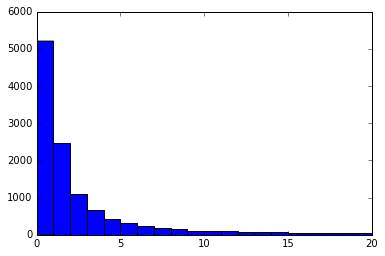

In [3]:
plt.hist(allpeakTFvar, bins=20, range=(0,20))

In [4]:
allpeakSFvar=[]
allmeanSFvar=[]
allmeanSFpPvar=[]
allpeakSFmPvar=[]

allpeakPHSF=[]
allpeakPHmSF=[]
allmeanPHpSF=[]
allmeansSFPHs=[]

SGcsids=[]

for file in file_list:
    cv_sgs=[]
    f = h5py.File(file)
    exp_id = file[35:44]
    if 'session_B' in file:
        data_set = boc.get_ophys_experiment_data(int(exp_id))
        csids = data_set.get_cell_specimen_ids()
        
        response = f["analysis/response_sg"].value
        f.close()
        sg_means = response[:,1:,:,:-1,0]
        peak = pd.read_hdf(file, 'analysis/peak')
        SFpeak=(peak.sf_sg-1).values
        PHpeak=(peak.phase_sg).values
        ORIpeak=(peak.ori_sg).values
        for i in range(sg_means.shape[3]):
            peakSForpeakPHs=sg_means[ORIpeak[i],:,PHpeak[i],i]
            peakSFormeanPHs=np.ndarray.mean(sg_means[ORIpeak[i],:,:,i],axis=1)
            meanSForpeakPHs=np.ndarray.mean(sg_means[:,:,PHpeak[i],i],axis=0)
            meanSFormeanPHs=np.ndarray.mean(sg_means[:,:,:,i],axis=0)
            meansSFPHs=np.ndarray.mean(meanSFormeanPHs[:,:],axis=1)
            
            peakPHSF=sg_means[ORIpeak[i],SFpeak[i],:,i]
            peakPHmSF=np.ndarray.mean(sg_means[ORIpeak[i],:,:,i],axis=0)
            meanPHpSF=np.ndarray.mean(sg_means[:,SFpeak[i],:,i],axis=0)
            meanSFPHs=np.ndarray.mean(sg_means[:,:,:,i],axis=0)
            meansSFPHs=np.ndarray.mean(meanSFormeanPHs[:,:],axis=0)
            
            allpeakSFvar.append(np.var(peakSForpeakPHs/peakSForpeakPHs.mean()))
            allmeanSFvar.append(np.var(meansSFPHs/meanSFPHs.mean()))
            allmeanSFpPvar.append(np.var(meanSForpeakPHs/meanSForpeakPHs.mean()))
            allpeakSFmPvar.append(np.var(peakSFormeanPHs/peakSFormeanPHs.mean()))
            
            allpeakPHSF.append(np.var(peakPHSF/peakPHSF.mean()))
            allpeakPHmSF.append(np.var(peakPHmSF/peakPHmSF.mean()))
            allmeanPHpSF.append(np.var(meanPHpSF/meanPHpSF.mean()))
            allmeansSFPHs.append(np.var(meansSFPHs/meansSFPHs.mean()))
            
            SGcsids.append(csids[i])
            
            
            #allPeakTFs.append(peakTFs)
        #allcv_sgs.append(cv_sgs)

In [5]:
SG_data_dict = {
    'cell_specimen_id':SGcsids,
    'allpeakSFvar': allpeakSFvar,
    'allmeanSFvar':allmeanSFvar,
    'allmeanSFpPvar':allmeanSFpPvar,
    'allpeakSFmPvar':allpeakSFmPvar,
    'allpeakPHSF':allpeakPHSF,
    'allpeakPHmSF':allpeakPHmSF,
    'allmeanPHpSF':allmeanPHpSF,
    'allmeansSFPHs':allmeansSFPHs,
    }
SG_data2={
    'cell_specimen_id':SGcsids,
    'allpeakSFvar': allpeakSFvar,
    }

DG_data2= {
    'cell_specimen_id':DGcsids,
    'allpeakTFvar':allpeakTFvar
    }

DG_data_dict = {
    'cell_specimen_id':DGcsids,
    'allmeanTFvar':allmeanTFvar,
    'allpeakTFvar':allpeakTFvar
    }

In [6]:
for i,v in SG_data_dict.iteritems():
    print len(v)

11983
11983
11983
11983
11983
11983
11983
11983
11983


In [7]:
#SGdf = pd.DataFrame(SG_data_dict)
#DGdf = pd.DataFrame(DG_data_dict)
import pickle
pickle.dump(SG_data_dict, open("SGdf.p","wb"))
pickle.dump(DG_data_dict, open("DGdf.p","wb"))

In [8]:
SGdf2 = pd.DataFrame(SG_data2)
DGdf2 = pd.DataFrame(DG_data2)
peakFcells = pd.merge(SGdf2, DGdf2, on='cell_specimen_id')

In [10]:
#len(allSFcells)

In [45]:
SGdf.head()

,allmeanPHpSF,allmeanSFpPvar,allmeanSFvar,allmeansSFPHs,allpeakPHSF,allpeakPHmSF,allpeakSFmPvar,allpeakSFvar,cell_specimen_id
0,0.048878,0.166323,0.006426,0.006426,1.362284,0.064248,0.268771,1.354312,517405059
1,0.428939,0.562752,0.178853,0.178853,15.871652,1.508481,2.005733,15.741330,517405064
2,0.022944,0.128368,0.001261,0.001261,0.745515,0.098767,0.153500,0.773604,517405645
3,0.122148,0.235220,0.002781,0.002781,1.274400,0.052121,0.338905,1.962458,517405045
4,0.155204,0.398598,0.009429,0.009429,4.839775,0.161295,0.434477,4.790846,517405040


In [31]:
np.save('static_SFphs_dataframe',SGdf)
np.save('drifting_TFs_dataframe',DGdf)

In [58]:
import pickle
pickle.dump(allSFcells, open("allSFcells_divByMean.p","wb"))
pickle.dump(peakFcells, open("peakFcells_divByMean.p","wb"))

In [59]:
peakFcells.head()

,allpeakSFvar,cell_specimen_id,allpeakTFvar
0,2.961931,517405064,52.965052
1,3.982051,517405645,0.467025
2,3.805047,517405045,10.038458
3,13.556555,517405040,6.182610
4,79.132337,517405526,17.003396


In [48]:
np.save('allSFcells_divByMean',allSFcells)

In [7]:
pd.DataFrame(boc.get_ophys_experiments(targeted_structures=['VISp']))

,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
0,123.0,Rorb-IRES2-Cre,511507144,501724959,275,three_session_A,VISp
1,98.0,Scnn1a-Tg3-Cre,511510911,508596945,350,three_session_B,VISp
2,116.0,Rorb-IRES2-Cre,511510675,509729072,275,three_session_C,VISp
3,132.0,Cux2-CreERT2,511510779,503019786,275,three_session_B,VISp
4,92.0,Scnn1a-Tg3-Cre,511510955,508753256,275,three_session_A,VISp
5,143.0,Cux2-CreERT2,511510927,501254258,275,three_session_C,VISp
6,123.0,Rorb-IRES2-Cre,511506664,496934409,275,three_session_C,VISp
7,156.0,Cux2-CreERT2,511507650,501794235,175,three_session_B,VISp
8,133.0,Rbp4-Cre,511510896,502741583,375,three_session_B,VISp
9,144.0,Rorb-IRES2-Cre,511510989,501729039,275,three_session_A,VISp


In [55]:
pd.DataFrame(allSFcells, columns=['allpeakSFvar' 'cell_specimen_id'])

array([  1.57413299e+01,   7.73604238e-01,   1.96245808e+00, ...,
         7.70260414e+02,   1.09098536e+00,   1.32367557e+03])